# Визуализация даных

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
#читаем файл с логинами
logs = pd.read_csv("dataset_mini.csv", sep=';')
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 27 columns):
ID                    2604 non-null int64
login                 2604 non-null int64
NlogonAll             2604 non-null int64
calendbinary          2604 non-null int64
filterbinary          2604 non-null int64
Nexport               2604 non-null int64
topic1                2604 non-null object
Nactive1              2604 non-null int64
topic2                2604 non-null int64
Nactive2              2604 non-null int64
topic3                2604 non-null int64
Nactive3              2604 non-null int64
diffdate              2604 non-null float64
diffbill              2604 non-null float64
fastbill              2604 non-null float64
msignal               2604 non-null int64
avgSectionbinary      2604 non-null float64
avgNullSearchW        2604 non-null float64
avgNullSearchM        2604 non-null float64
avgEmptyStupid        2604 non-null float64
Nlongfilter           2604 non-null in

In [2]:
logs["topic1"] = pd.to_numeric(logs["topic1"], errors = "coerse")
logs = logs.dropna()
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 0 to 2603
Data columns (total 27 columns):
ID                    2603 non-null int64
login                 2603 non-null int64
NlogonAll             2603 non-null int64
calendbinary          2603 non-null int64
filterbinary          2603 non-null int64
Nexport               2603 non-null int64
topic1                2603 non-null float64
Nactive1              2603 non-null int64
topic2                2603 non-null int64
Nactive2              2603 non-null int64
topic3                2603 non-null int64
Nactive3              2603 non-null int64
diffdate              2603 non-null float64
diffbill              2603 non-null float64
fastbill              2603 non-null float64
msignal               2603 non-null int64
avgSectionbinary      2603 non-null float64
avgNullSearchW        2603 non-null float64
avgNullSearchM        2603 non-null float64
avgEmptyStupid        2603 non-null float64
Nlongfilter           2603 non-null i

In [3]:
# анализ распределения целевой переменной  is_loyality
logs.is_loyality.value_counts()

1    1360
0    1243
Name: is_loyality, dtype: int64

([<matplotlib.axis.XTick at 0x22c51cdf630>,
 <a list of 2 Text xticklabel objects>)

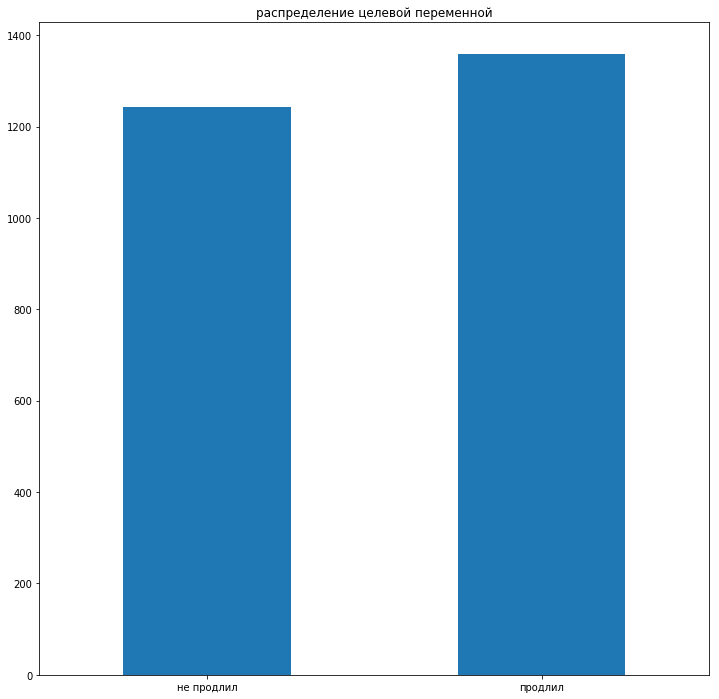

In [5]:
#визуализация распределения целевой переменной is_loyality
plt.clf()
logs.is_loyality.value_counts().sort_index().plot(kind = "bar", sort_columns = True)
plt.title("распределение целевой переменной")
plt.xticks([0,1], ("не продлил", "продлил"), rotation=0)


Анализируем переменную NlogonAll - суммарное число входов

In [8]:
#анализируем 
#рассчитаем корреляцию с целевой переменной
np.corrcoef(logs["NlogonAll"], logs.is_loyality)[0,1]

0.35800347944503441

In [9]:
#второй способ расчета корреляции (выдает еще и уровень значимости)
from scipy.stats.stats import pearsonr
Corr =  pearsonr(logs["NlogonAll"], logs.is_loyality)
print("Коэффициент корреляции: {}".format(Corr[0]))
print("p-value (вероятность того, что данный коэффициент был бы получен из случайной выборки) : " + str(Corr[1]))

Коэффициент корреляции: 0.3580034794450344
p-value (вероятность того, что данный коэффициент был бы получен из случайной выборки) : 1.48988985062e-79


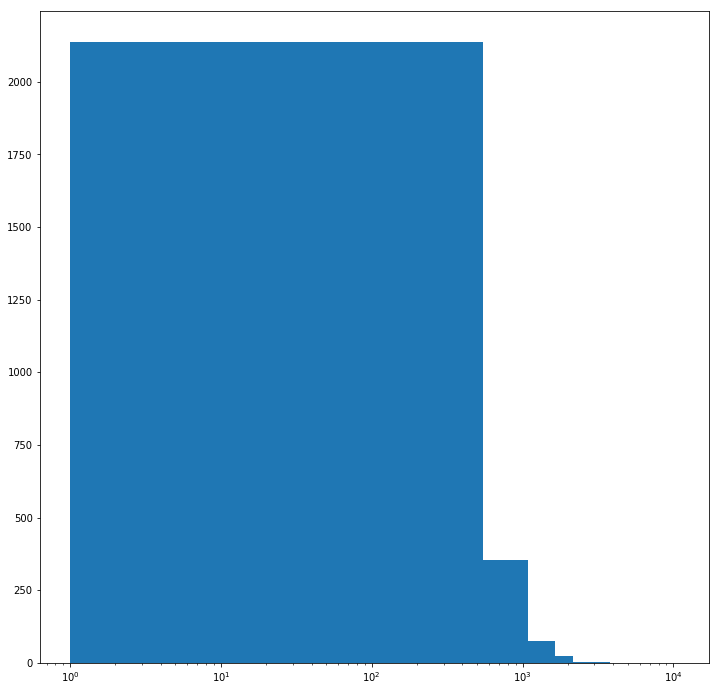

In [8]:
#строим гистограмму
plt.clf()
plt.hist(logs.NlogonAll, bins = 20)#, range = (0, logs.NlogonAll.quantile(0.95)))
#plt.xscale("log")
#plt.xlim([0, 2000])
#plt.xlim([0, logs.NlogonAll.quantile(0.95)])
plt.show()
#надо убрать выбросы

In [ ]:
#строим boxplot
plt.subplot(1,2,1)
#обычный boxplot
plt.boxplot(logs["NlogonAll"])
plt.subplot(1,2,2)
#boxplot с логарифмической шкалой
plt.boxplot(logs["NlogonAll"])
plt.yscale("log")


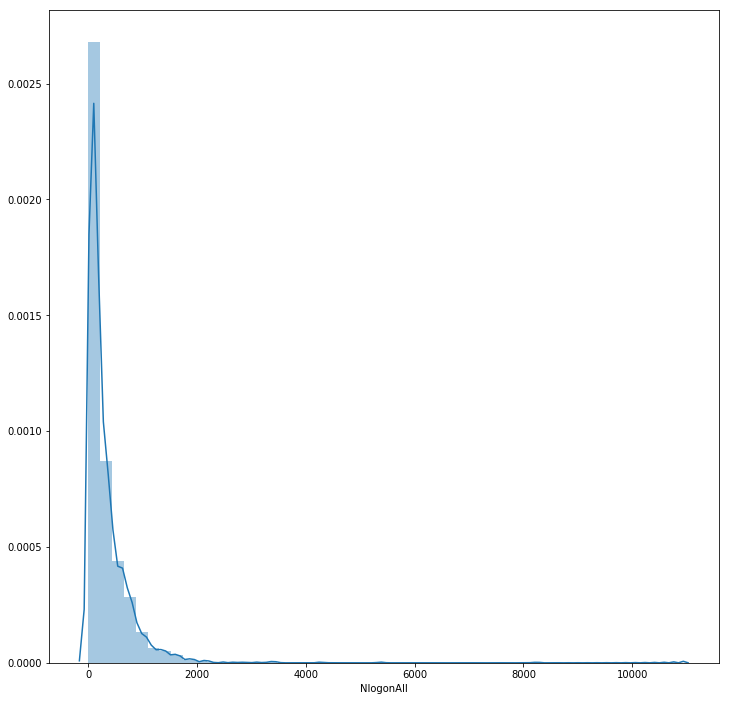

In [14]:
#еще один способ сделать гистограмму
sns.distplot(logs["NlogonAll"])
#plt.xlim([0, logs.NlogonAll.quantile(0.99)])
plt.show()

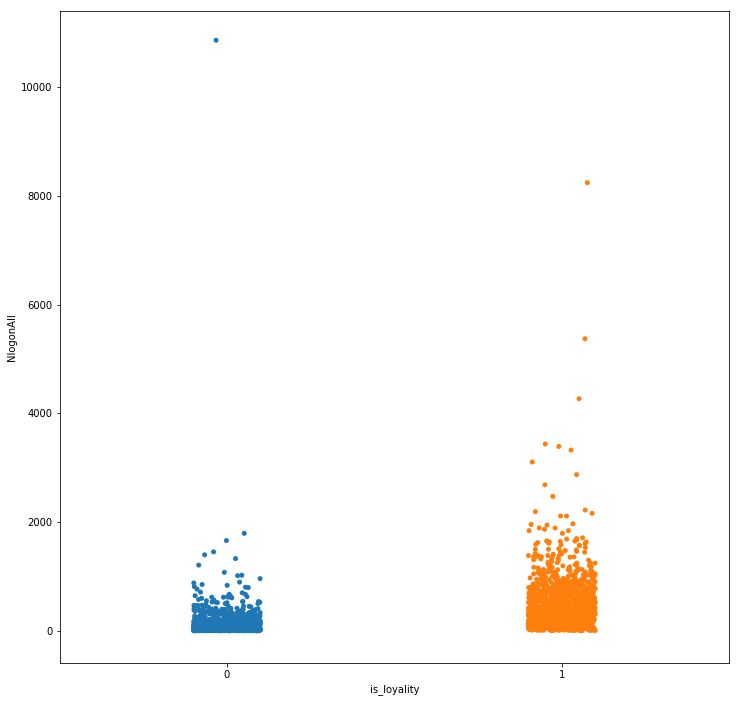

In [15]:
# stripplot
sns.stripplot(y = "NlogonAll", x = "is_loyality", data = logs, jitter = True)
plt.show()

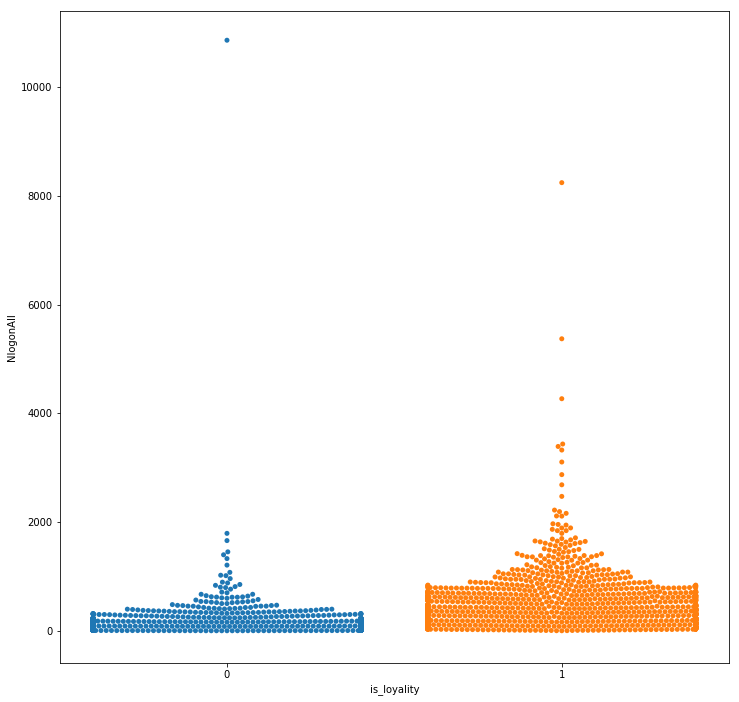

In [16]:
#swarmplot
sns.swarmplot(y = logs["NlogonAll"],x = logs["is_loyality"])
plt.show()

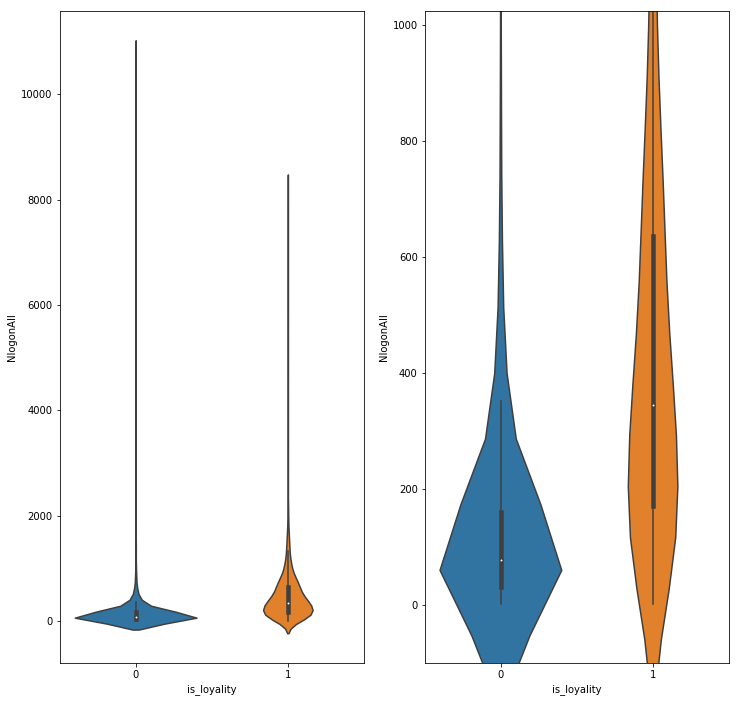

In [17]:
#violinplot
plt.subplot(1,2,1)
sns.violinplot(y = logs["NlogonAll"],x = logs["is_loyality"])
plt.subplot(1,2,2)
sns.violinplot(y = logs["NlogonAll"],x = logs["is_loyality"])
plt.ylim((-100, logs.NlogonAll.quantile(0.95)))
plt.show()

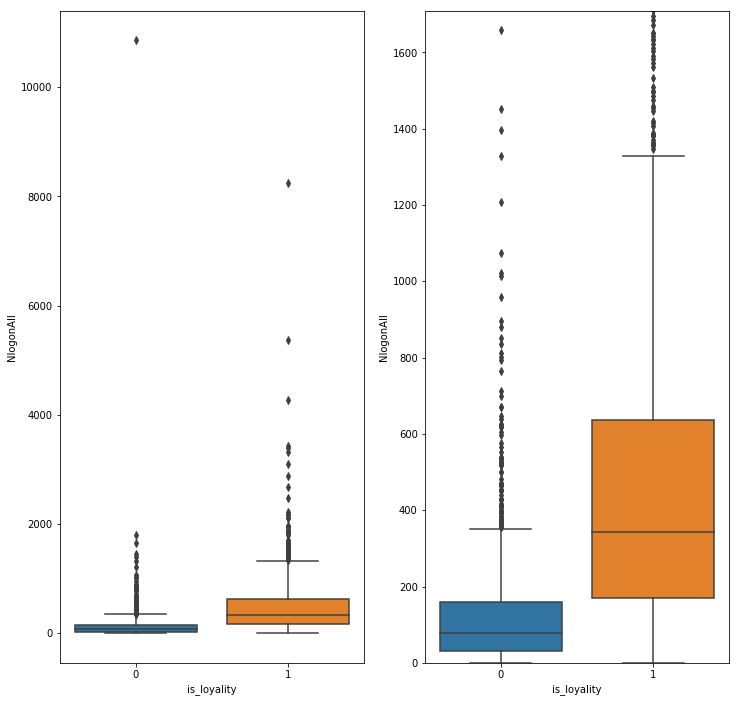

In [18]:
plt.subplot(1,2,1)
sns.boxplot(y = logs["NlogonAll"],x = logs["is_loyality"])
plt.subplot(1,2,2)
sns.boxplot(y = logs["NlogonAll"],x = logs["is_loyality"])
plt.ylim((0, logs.NlogonAll.quantile(0.99)))
plt.show()

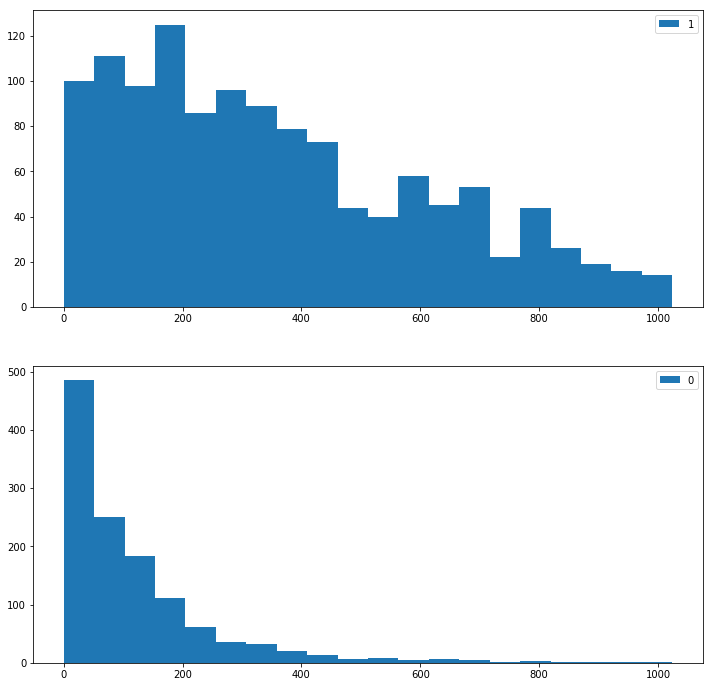

In [19]:
#рисуем гистограммы для разных классов
plt.clf()
plt.subplot(2,1,1)
plt.hist((logs.NlogonAll[logs.is_loyality == 1]), label = "1",bins = 20, range = (0, logs.NlogonAll.quantile(0.95)))
plt.legend()
plt.subplot(2,1,2)
plt.hist((logs.NlogonAll[logs.is_loyality == 0]), label = "0", bins = 20, range = (0, logs.NlogonAll.quantile(0.95)))
plt.legend()
plt.show()

C:\Users\konyushkov.a\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


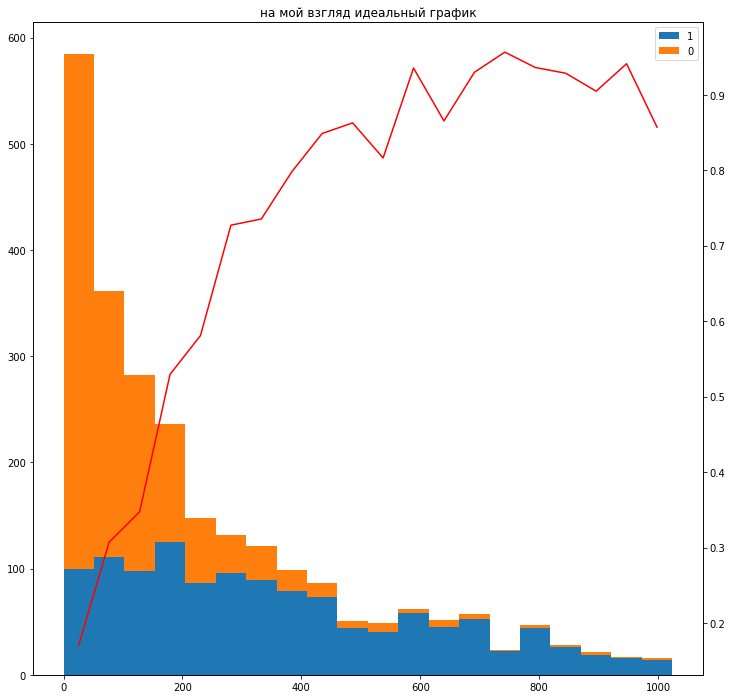

In [20]:
#рисуем гистограмма с разделением на классы

plt.clf()
n, bins, patches = plt.hist([(logs.NlogonAll[logs.is_loyality == 1]),(logs.NlogonAll[logs.is_loyality == 0])], label = ("1", "0"), stacked = True, bins = 20, range = (0, logs.NlogonAll.quantile(0.95)))
plt.legend()


loyal = np.empty(len(bins)-1)
not_loyal = np.empty(len(bins)-1)
loyal_percent = np.empty(len(bins)-1)
coord = np.empty(len(bins)-1)
#All = np.darray()
for i in range(len(bins)-1):
    loyal[i] = (((logs["is_loyality"] == 1) & (logs["NlogonAll"] >= bins[i]) & (logs["NlogonAll"] < bins[i+1]) ).sum()) 
    not_loyal[i] = (((logs["is_loyality"] == 0) & (logs["NlogonAll"] >= bins[i]) & (logs["NlogonAll"] < bins[i+1]) ).sum())
    loyal_percent [i] = loyal[i]/(loyal[i] + not_loyal[i])
    coord[i] = (bins[i] + bins[i+1])/2
plt.twinx()
plt.plot(coord, loyal_percent, color = "red")
plt.title("на мой взгляд идеальный график")
plt.show()



C:\Users\konyushkov.a\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


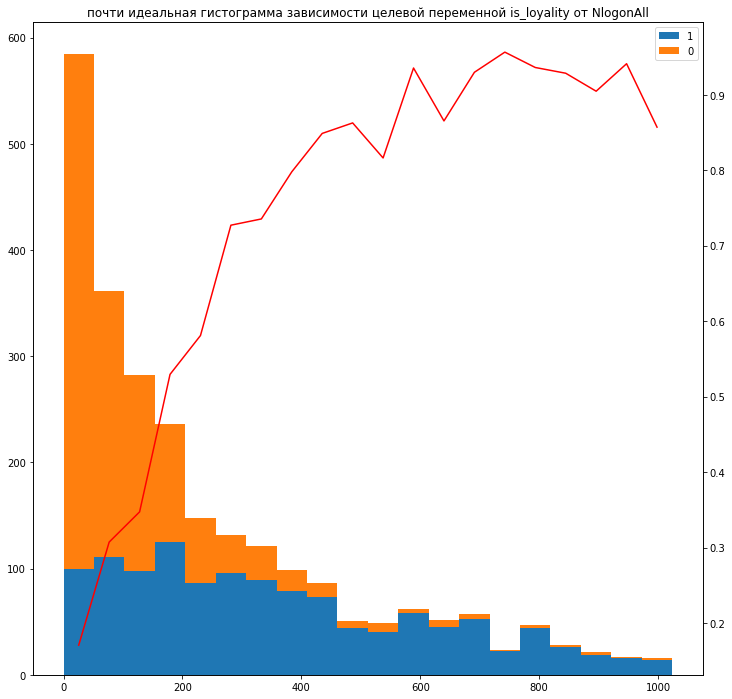

In [21]:
def idealhist (column , target, Bins):
    plt.clf()
    n, bins, patches = plt.hist([(logs.loc[logs[target] == 1, column]),(logs.loc[logs[target] == 0, column])], label = ("1", "0"), stacked = True, bins = Bins, range = (0, logs[column].quantile(0.95)))
    plt.legend()
    loyal = np.empty(len(bins)-1)
    not_loyal = np.empty(len(bins)-1)
    loyal_percent = np.empty(len(bins)-1)
    coord = np.empty(len(bins)-1)
    #All = np.darray()
    for i in range(len(bins)-1):
        loyal[i] = (((logs[target] == 1) & (logs[column] >= bins[i]) & (logs[column] < bins[i+1]) ).sum())
        not_loyal[i] = (((logs[target] == 0) & (logs[column] >= bins[i]) & (logs[column] < bins[i+1]) ).sum())
        loyal_percent [i] = loyal[i]/(loyal[i] + not_loyal[i])
        coord[i] = (bins[i] + bins[i+1])/2
    plt.twinx()
    plt.plot(coord, loyal_percent, color = "red")
    plt.title("почти идеальная гистограмма зависимости целевой переменной {} от {}".format(target, column))
    plt.show()

idealhist( "NlogonAll", "is_loyality",  20)
    

Суммарная статистика по всем переменным

In [22]:
#матрица корреляций полностью
logs.corr()

,ID,login,NlogonAll,calendbinary,filterbinary,Nexport,topic1,Nactive1,topic2,Nactive2,...,avgNullSearchW,avgNullSearchM,avgEmptyStupid,Nlongfilter,NcontractAll,NcontractAllReq,NprotNotAll,NprotNotAllAuction,protContractRatio,is_loyality
ID,1.000000,-0.021354,-0.191623,0.015653,-0.033580,-0.019548,-0.042694,-0.096908,-0.051718,-0.096965,...,0.004362,-0.007959,0.002907,-0.073740,-0.014461,-0.023545,-0.037435,-0.045971,-0.239459,-0.204656
login,-0.021354,1.000000,0.000745,0.018829,0.020202,0.042961,-0.021782,-0.007011,-0.021016,-0.007007,...,0.081529,0.066501,0.058165,0.017716,0.089257,0.093172,0.102373,0.114256,0.012006,0.055237
NlogonAll,-0.191623,0.000745,1.000000,0.087868,0.071927,0.307924,-0.062221,0.284534,-0.052935,0.284558,...,0.033974,0.024056,-0.077851,0.238655,-0.025163,-0.025435,-0.014411,-0.009581,0.044112,0.358003
calendbinary,0.015653,0.018829,0.087868,1.000000,0.107542,0.063132,-0.032249,0.025202,0.001277,0.025228,...,0.051821,0.046657,-0.003949,0.135784,-0.047408,-0.060934,-0.059415,-0.055952,-0.042564,0.083905
filterbinary,-0.033580,0.020202,0.071927,0.107542,1.000000,0.062018,0.046706,-0.007695,0.073469,-0.007657,...,0.192457,0.154658,0.337750,0.149922,0.007502,0.020974,0.024201,0.019006,-0.015316,0.091455
Nexport,-0.019548,0.042961,0.307924,0.063132,0.062018,1.000000,-0.041991,0.137488,-0.036593,0.137505,...,0.046386,0.033917,-0.000886,0.273886,-0.021771,-0.013877,-0.000853,0.008108,0.006746,0.210964
topic1,-0.042694,-0.021782,-0.062221,-0.032249,0.046706,-0.041991,1.000000,-0.073329,0.761269,-0.073375,...,0.001847,-0.001296,0.046379,-0.058440,-0.023395,-0.028714,-0.026710,-0.027072,0.016069,0.002146
Nactive1,-0.096908,-0.007011,0.284534,0.025202,-0.007695,0.137488,-0.073329,1.000000,-0.070944,0.999998,...,0.012006,0.019794,-0.036566,0.137566,-0.006481,-0.010418,0.002474,0.008659,-0.000520,0.122157
topic2,-0.051718,-0.021016,-0.052935,0.001277,0.073469,-0.036593,0.761269,-0.070944,1.000000,-0.070856,...,0.008570,0.009677,0.050557,-0.038710,-0.029228,-0.022375,-0.020494,-0.024878,0.023548,0.002671
Nactive2,-0.096965,-0.007007,0.284558,0.025228,-0.007657,0.137505,-0.073375,0.999998,-0.070856,1.000000,...,0.012018,0.019821,-0.036579,0.137564,-0.006472,-0.010405,0.002488,0.008673,-0.000459,0.122220


In [15]:
#матрица корреляций с целевой переменной
logs.corr()["is_loyality"]

ID                   -0.204656
login                 0.055237
NlogonAll             0.358003
calendbinary          0.083905
filterbinary          0.091455
Nexport               0.210964
topic1                0.002146
Nactive1              0.122157
topic2                0.002671
Nactive2              0.122220
topic3                0.021996
Nactive3              0.122252
diffdate              0.348598
diffbill              0.005305
fastbill             -0.031163
msignal               0.201153
avgSectionbinary      0.017627
avgNullSearchW        0.127726
avgNullSearchM        0.101236
avgEmptyStupid       -0.260180
Nlongfilter           0.175583
NcontractAll          0.028608
NcontractAllReq       0.031536
NprotNotAll           0.038697
NprotNotAllAuction    0.045836
protContractRatio     0.152993
is_loyality           1.000000
Name: is_loyality, dtype: float64

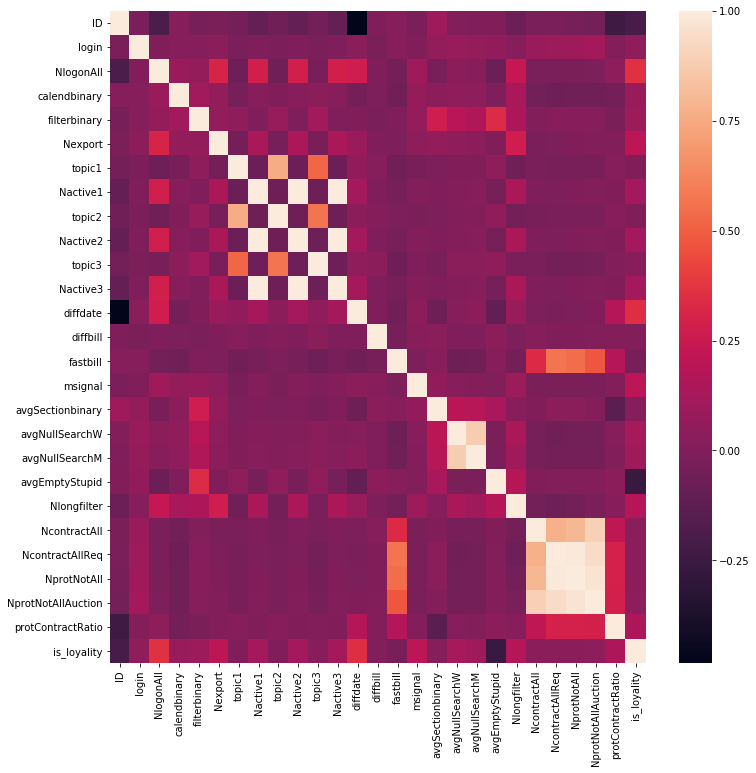

In [31]:
#матрица корреляций с целевой переменной
plt.clf()
sns.heatmap(logs.corr())

plt.show()

Проанализируем признак filterbinary - использование фильтров

In [23]:
logs["filterbinary"] = logs["filterbinary"].astype("category")
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 0 to 2603
Data columns (total 27 columns):
ID                    2603 non-null int64
login                 2603 non-null int64
NlogonAll             2603 non-null int64
calendbinary          2603 non-null int64
filterbinary          2603 non-null category
Nexport               2603 non-null int64
topic1                2603 non-null float64
Nactive1              2603 non-null int64
topic2                2603 non-null int64
Nactive2              2603 non-null int64
topic3                2603 non-null int64
Nactive3              2603 non-null int64
diffdate              2603 non-null float64
diffbill              2603 non-null float64
fastbill              2603 non-null float64
msignal               2603 non-null int64
avgSectionbinary      2603 non-null float64
avgNullSearchW        2603 non-null float64
avgNullSearchM        2603 non-null float64
avgEmptyStupid        2603 non-null float64
Nlongfilter           2603 non-nul

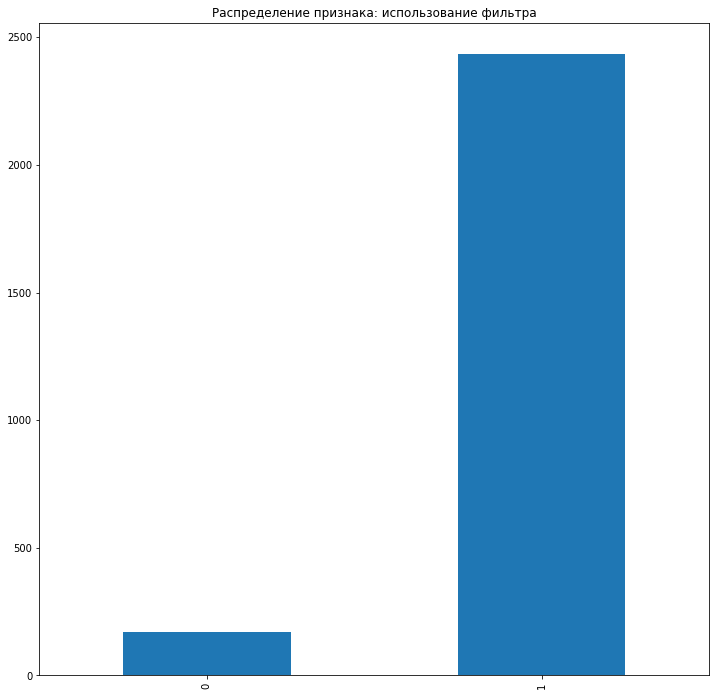

In [24]:
logs['filterbinary'].value_counts().sort_index().plot(kind='bar')
#plt.legend()
plt.title('Распределение признака: использование фильтра');
plt.show()

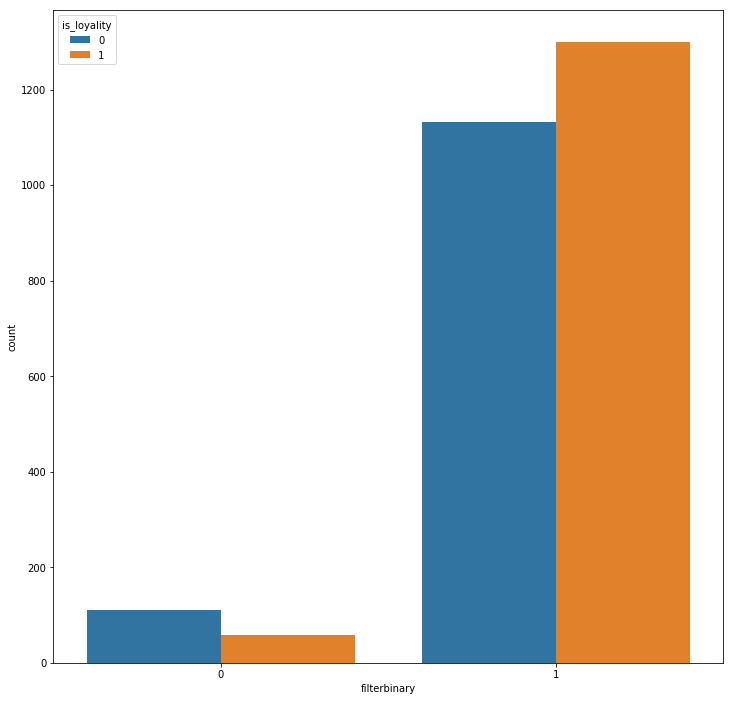

In [25]:
plt.clf
sns.countplot(x = logs["filterbinary"], hue = logs.is_loyality)
plt.show()

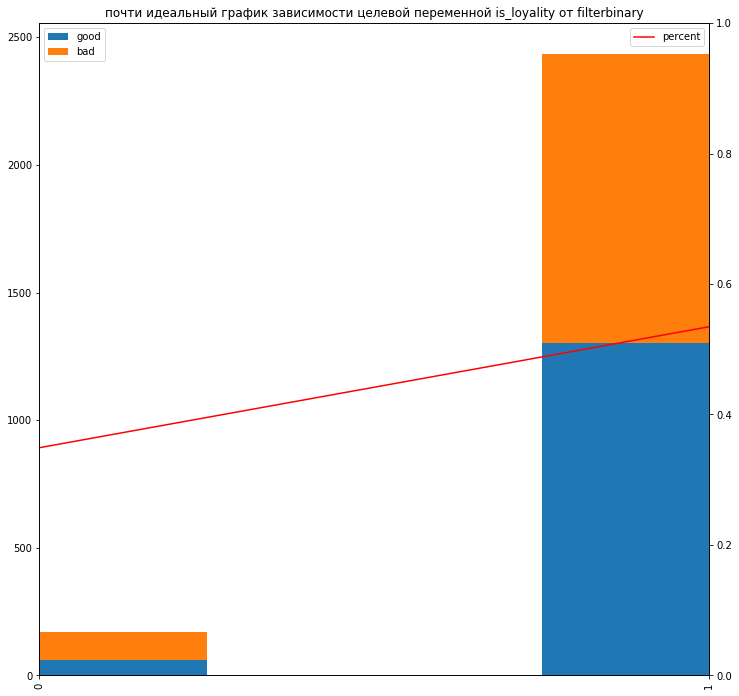

In [113]:

def idealbar (column , target):
    plt.clf()
    grouped =  logs.groupby([target, column])[column].count()
    data=pd.DataFrame()
    for i in np.sort(logs[column].unique()):
        data.loc[i, "percent"] = grouped[1, i]/(grouped[1, i]+grouped[0, i])
        data.loc[i, "good"] = grouped[1, i]
        data.loc[i, "bad"] = grouped[0, i]  
    data[["good", "bad"]].plot( kind = "bar", stacked = True )
    plt.twinx()
    data["percent"].plot(color = "red", label = "percent")
    plt.ylim((0,1))
    plt.legend()
    plt.title("почти идеальный график зависимости целевой переменной {} от {}".format(target, column))
    plt.show()
    
idealbar("filterbinary", "is_loyality")